# Visualize/Plot all the data available in the folders 
in order to get a visual overview with my knowledge now available. The plan is to write a script in order to plot every available file

put all the data names in a .txt file open the data files one by one: plot them with x axis the time in $\mu$seconds the y axis in mV and the title should be the name of the file

## before writing the loop and the script, lets check how to plot the data in best way

In [1]:
! head -3 C4Xe1bar_expKamm16e-4mbar_tofKamm-6e-6mbar_eGun-118V_Ablenkplt200V_Flugrohr-1kV_MCP2p4kV-106microAmp_Pulser-294V_Duese-20mu-puls100Hz-300K00000.dat

-1.48005e-005 -7.26858e-006
-1.48e-005 1.21143e-005
-1.47995e-005 2.18058e-005


In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### since these data doesnt have a header we use `names=['time','volt']` to insert a header

In [24]:
data =pd.read_csv('C4Xe1bar_expKamm16e-4mbar_tofKamm-6e-6mbar_eGun-118V_Ablenkplt200V_Flugrohr-1kV_MCP2p4kV-106microAmp_Pulser-294V_Duese-20mu-puls100Hz-300K00000.dat',sep =' ',names=['time','volt'])

In [25]:
# change the prefixes  of time and volt units and turn the signal to positive
data['time (usec)']= data['time']*1e6
data['volt (mV)'] = data['volt']* -1e3

In [26]:
data.head(3)

,time,volt,time (usec),volt (mV)
0,-0.000015,-0.000007,-14.8005,0.007269
1,-0.000015,0.000012,-14.8000,-0.012114
2,-0.000015,0.000022,-14.7995,-0.021806


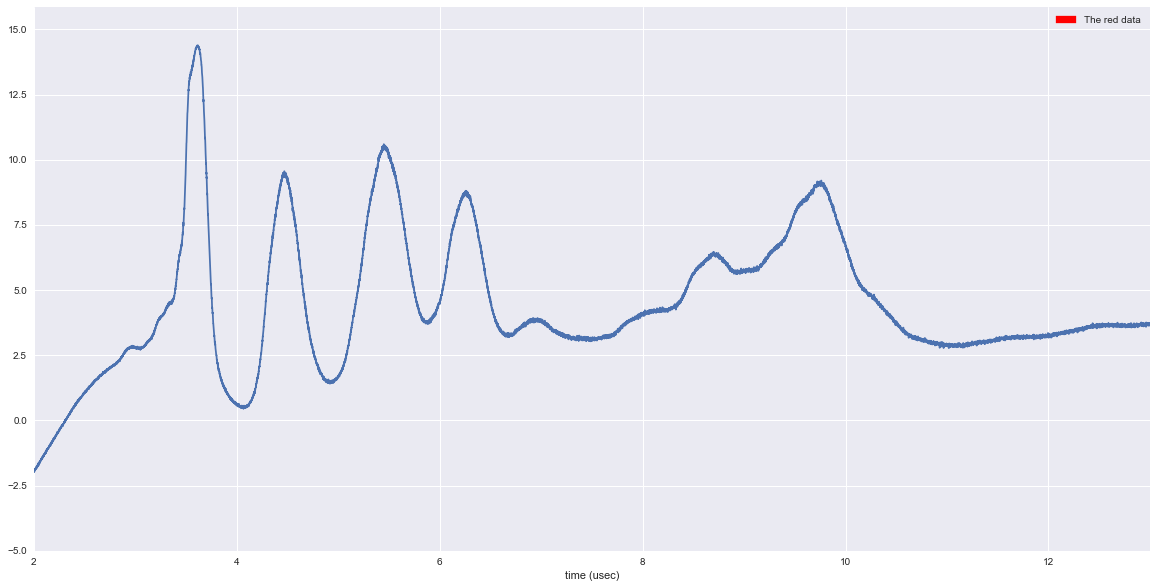

In [29]:
#data.plot('time (usec)','volt (mV)', figsize=(10,10));
import matplotlib.patches as mpatches   #needed for the legend handle
ax = data.plot('time (usec)','volt (mV)', figsize=(20,10))
ax.set_xlim(2, 13)
ax.set_ylim(-5, None)
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])

## Lets check how to loop over the files with their names in the data `filenames22.txt` 
I am going to create two data files  `data1.txt` and `data2.txt` and put some numbers in them 

In [11]:
d =pd.read_csv('d1.txt', sep =' ' ,names=['time','volt'])

NameError: name 'mpatches' is not defined

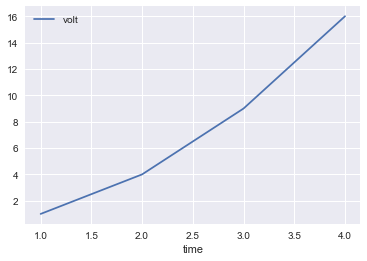

In [22]:
d.plot('time','volt')
red_patch = mpatches.Patch(color='red', label='The red data')
plot.legend(handles=[red_patch])

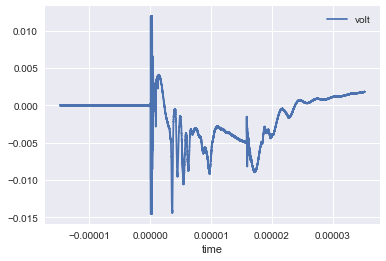

In [9]:
data.plot('time','volt')

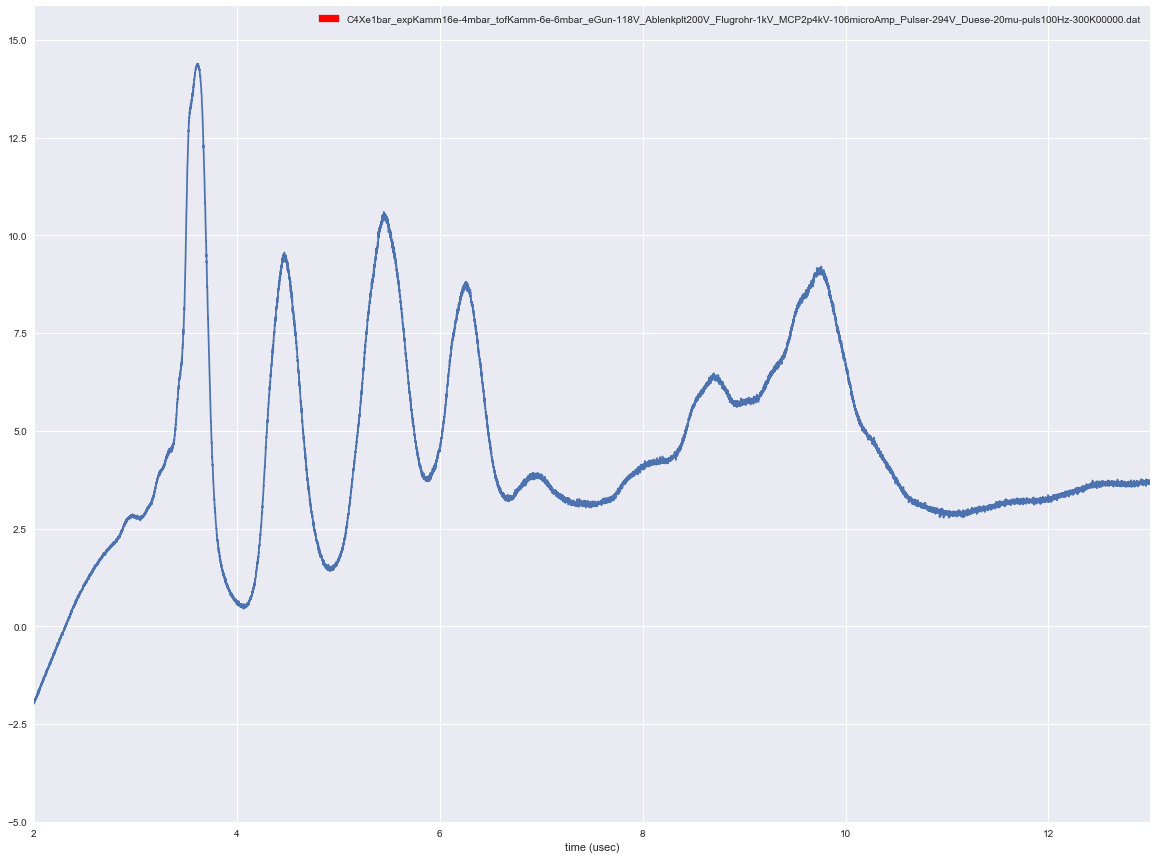

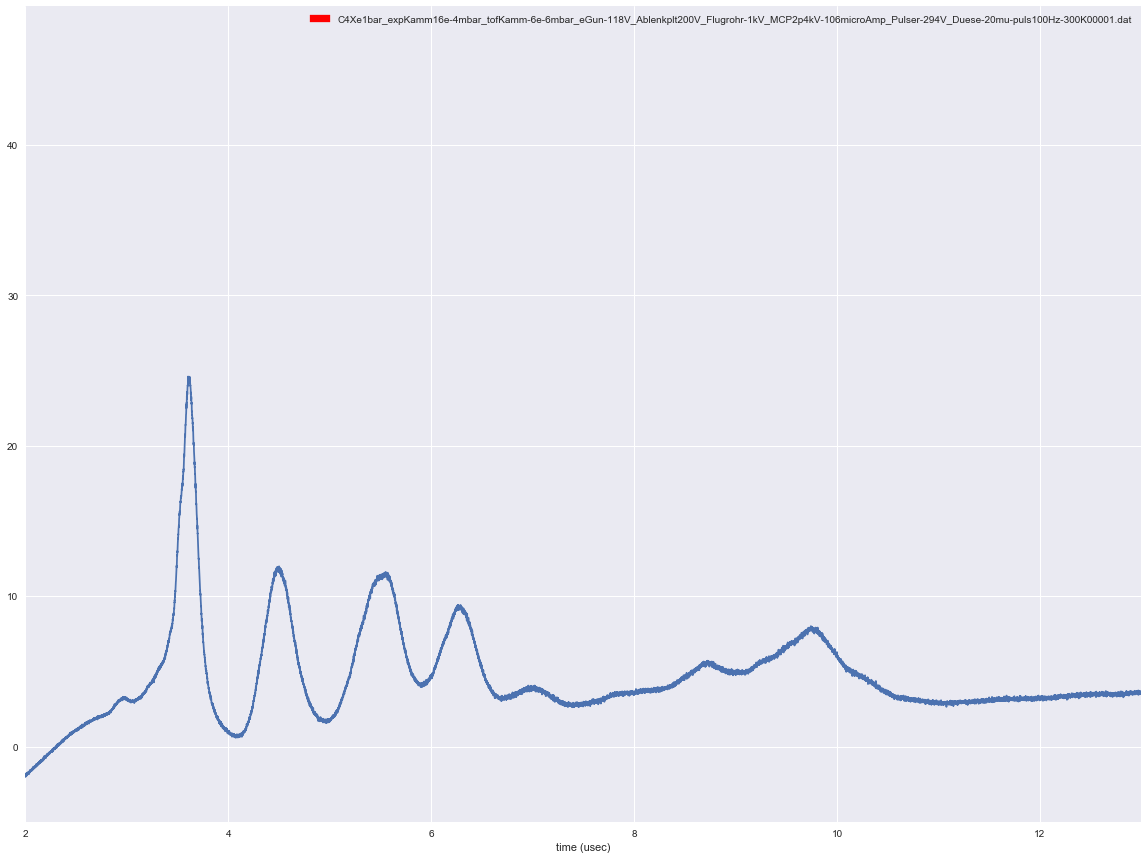

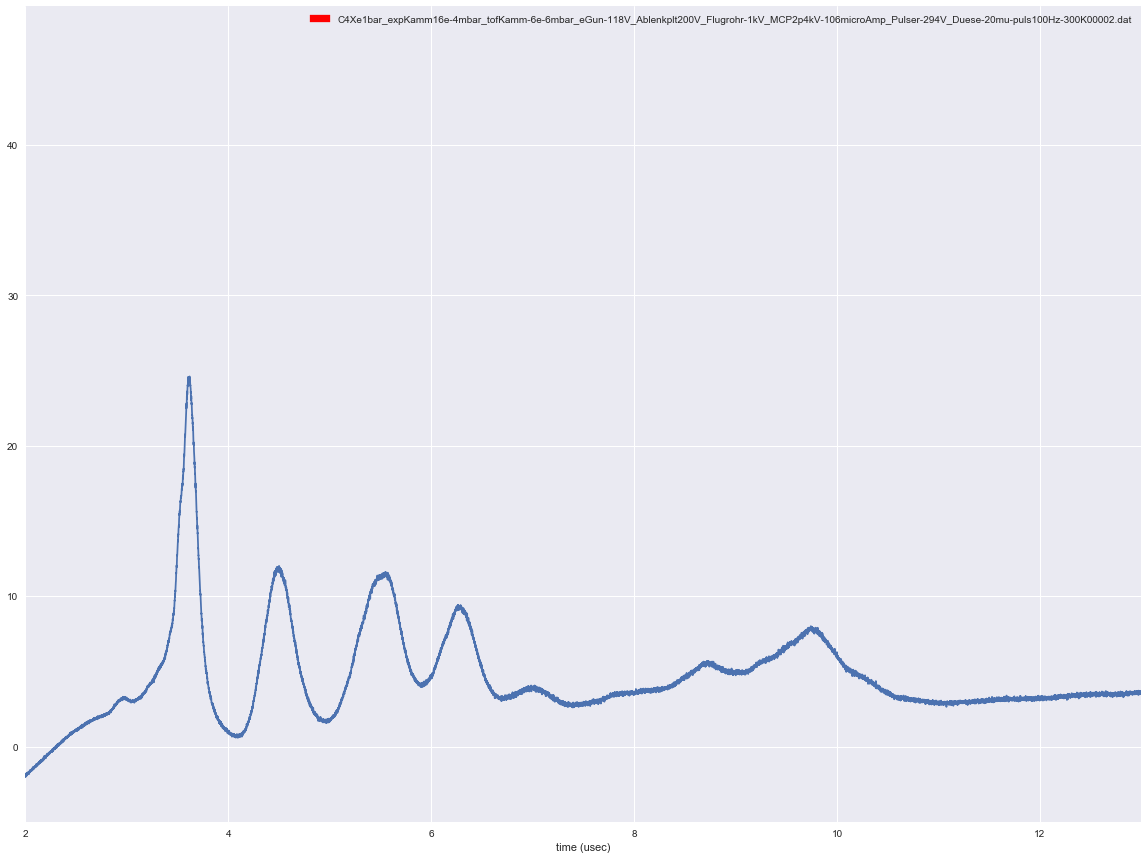

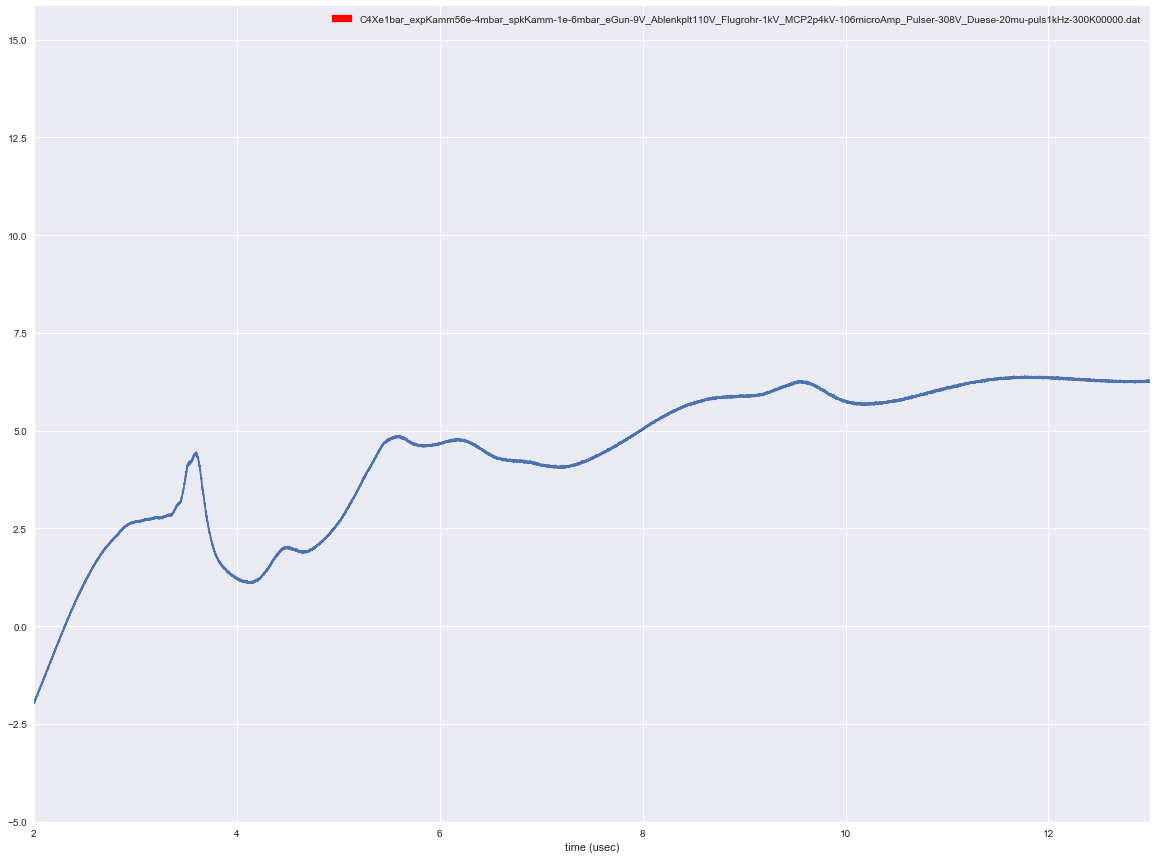

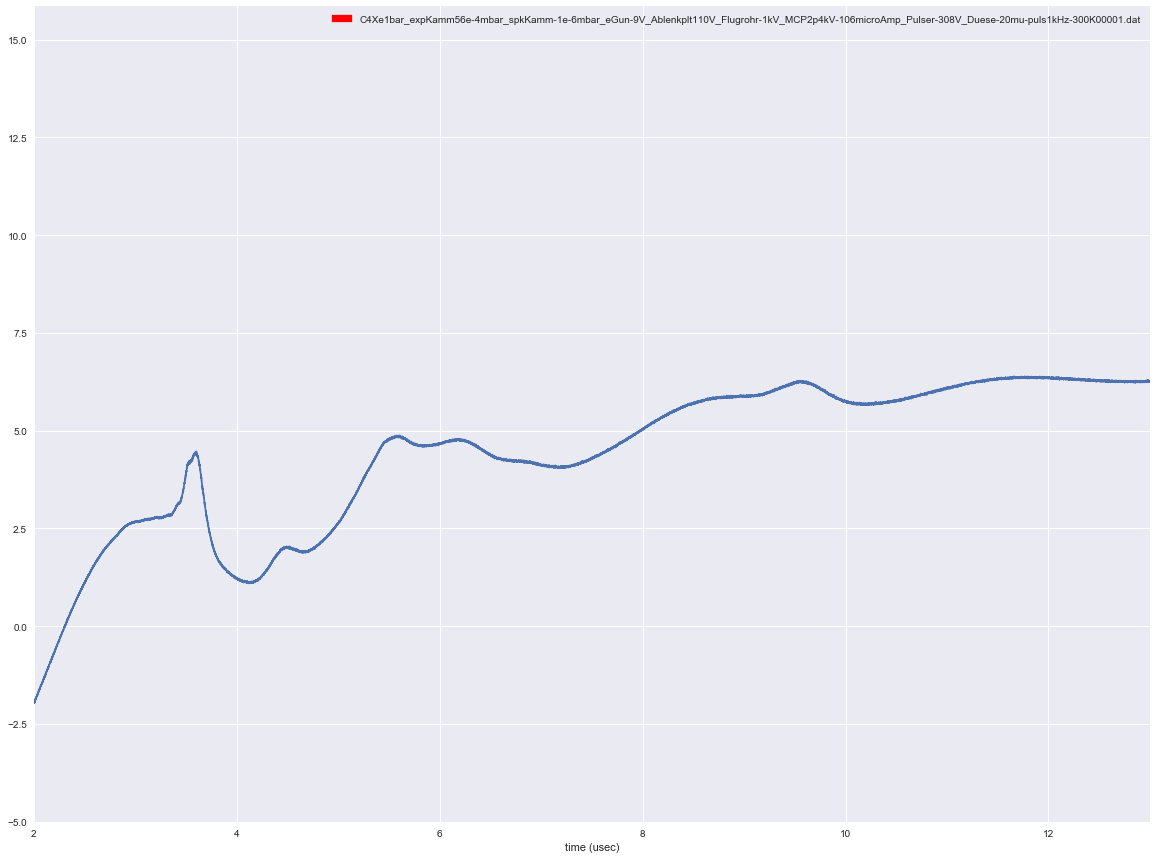

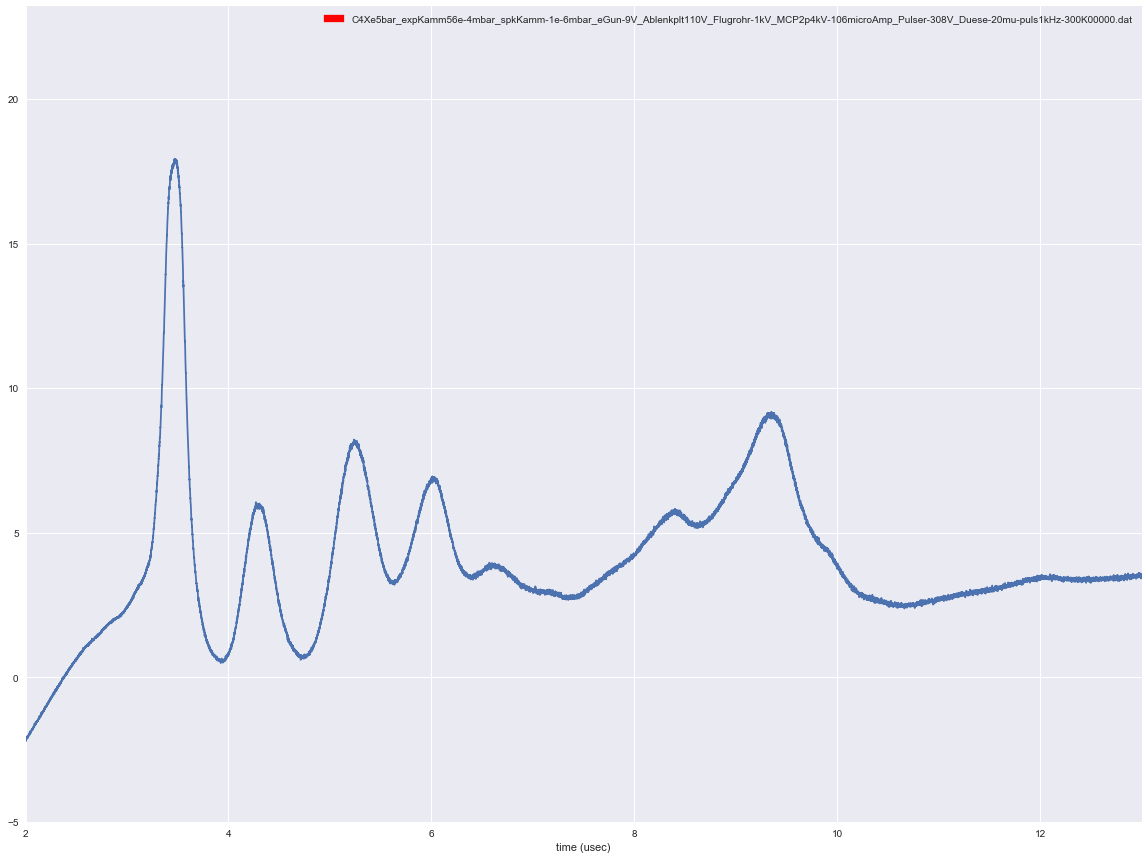

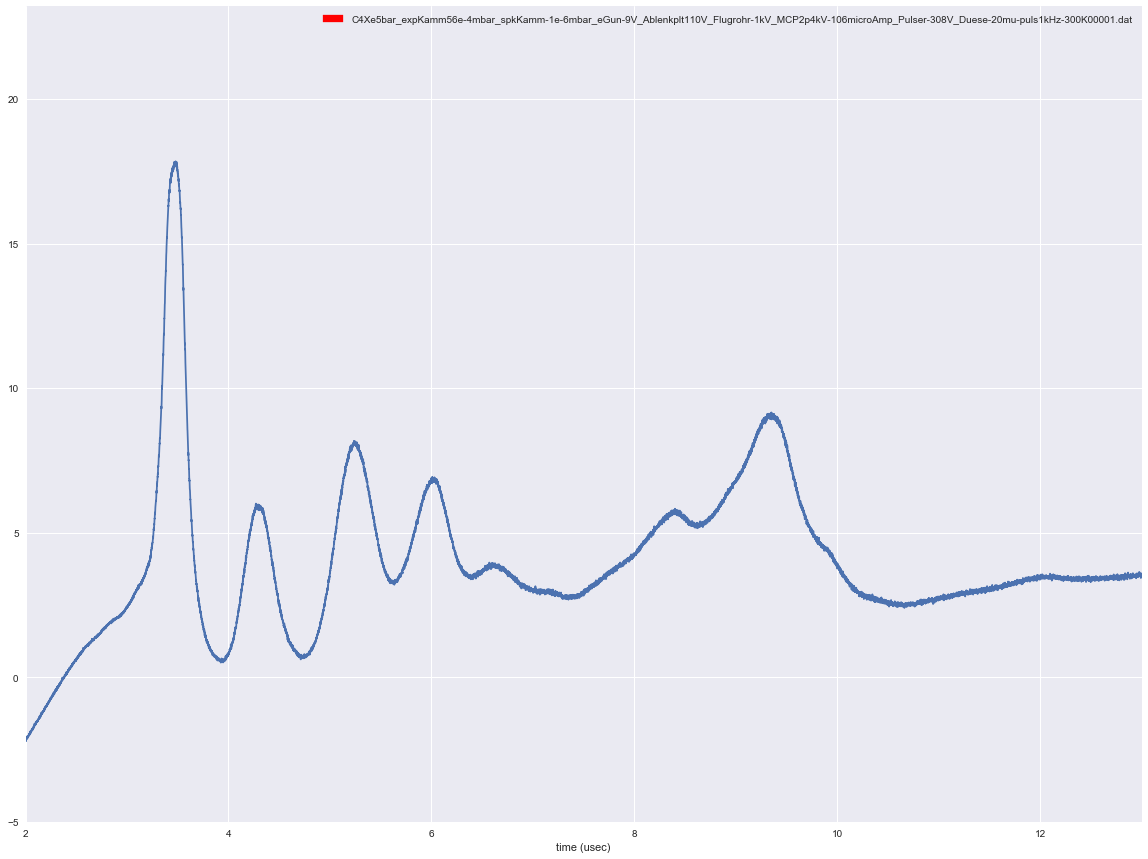

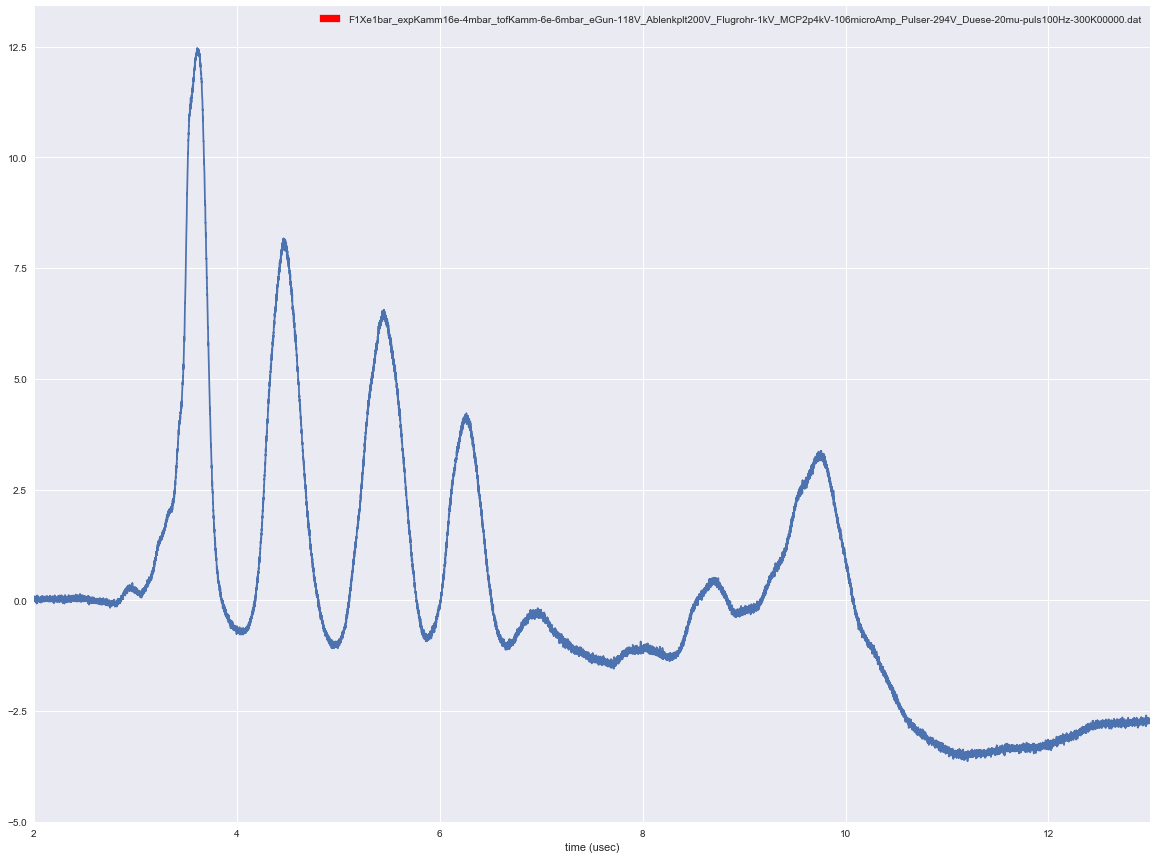

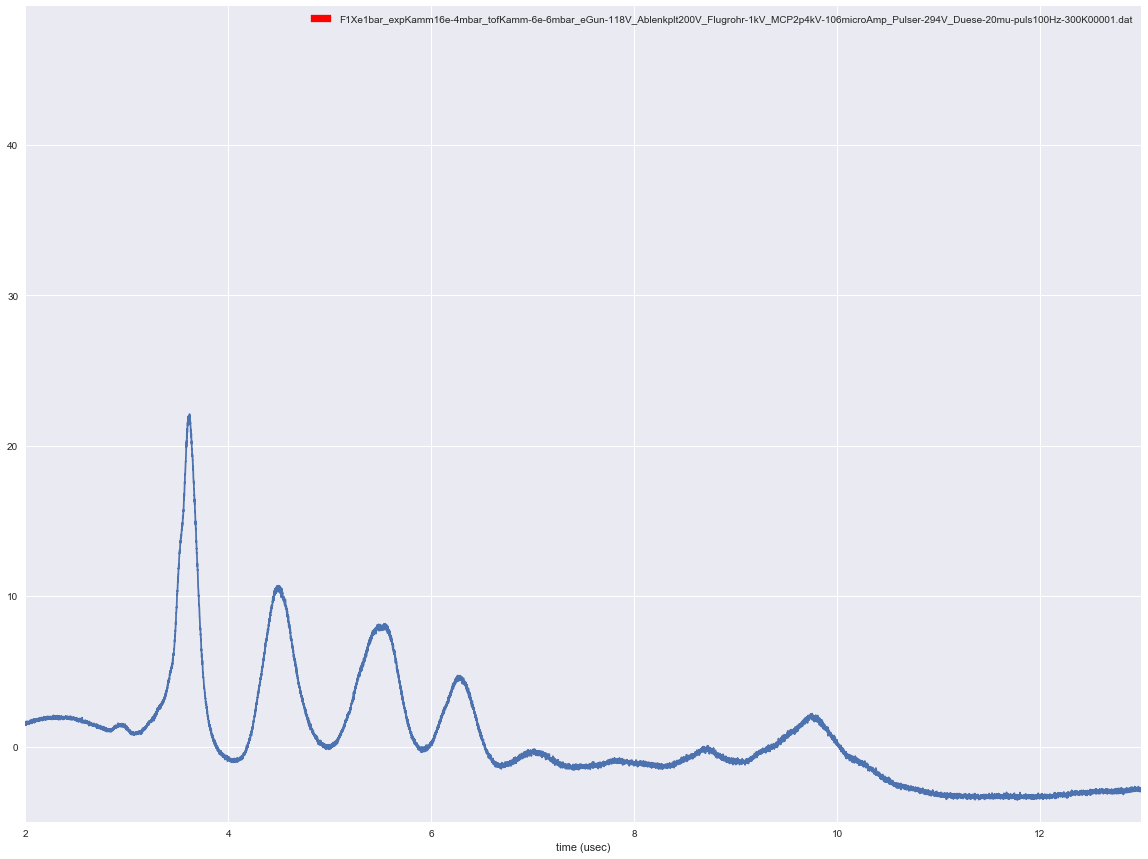

In [37]:
# need to loop through a large number of files with a specific ending.  here *.csv
import os
import pandas as pd

numFiles = [] # is an empty list
fileNames = os.listdir() # lists the contents of the directory and puts them into a list called fileNames

for fileNames in fileNames:  # loops through fileNames list
    if fileNames.endswith(".dat"):  # if a file ends with .csv 
        numFiles.append(fileNames)                    # put the file with *.csv ending into numFiles list

# now loop throhgh the numFiles list, load them into a pandas dataframe and plot the data 
for data in numFiles:
    d =pd.read_csv(data, sep =' ' ,names=['time','volt'])
    d['time (usec)']= d['time']*1e6
    d['volt (mV)'] = d['volt']* -1e3
    ax = d.plot('time (usec)','volt (mV)', figsize=(20,15))
    ax.set_xlim(2, 13)
    ax.set_ylim(-5, None)
    red_patch = mpatches.Patch(color='red', label=data)
    ax.legend(handles=[red_patch])

`ddfdf` bla

In [35]:
dddfdfdf 

NameError: name 'dddfdfdf' is not defined